In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-filter/emails.csv


Loading and Observing the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/spam-filter/emails.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.shape

(5728, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


No Missing Values


In [7]:
df.isna().sum()

text    0
spam    0
dtype: int64

**Exploratory Data Analysis**

In [8]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

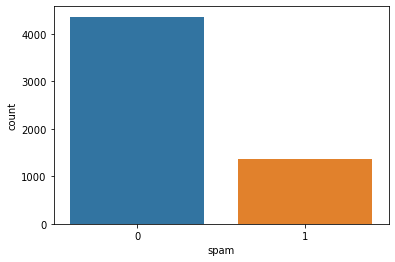

In [9]:
sns.countplot(df['spam'])

Checking the Length of email and it's relation

In [10]:
from nltk import word_tokenize

Function that tokenizes each and every email into words and returns it's length

In [12]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

Applying the function to df['text'] and storing the count in another column

In [15]:
df['count']=df['text'].apply(count_words)

In [16]:
df['count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: count, Length: 5728, dtype: int64

In [17]:
df.groupby('spam')['count'].mean()

spam
0    346.835321
1    267.896199
Name: count, dtype: float64

In [18]:
df

,text,spam,count
0,Subject: naturally irresistible your corporate...,1,325
1,Subject: the stock trading gunslinger fanny i...,1,90
2,Subject: unbelievable new homes made easy im ...,1,88
3,Subject: 4 color printing special request add...,1,99
4,"Subject: do not have money , get software cds ...",1,53
...,...,...,...
5723,Subject: re : research and development charges...,0,298
5724,"Subject: re : receipts from visit jim , than...",0,245
5725,Subject: re : enron case study update wow ! a...,0,516
5726,"Subject: re : interest david , please , call...",0,277


# Text Prepreocessing

**Function to Process the text data and 1. Remove Punctuation 2.Stop Words 3.Stemming**

In [ ]:
import string
from nltk.corpus import stopwords


In [ ]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text']=df['text'].apply(process_text)

In [ ]:
df['text']

**After cleaning the text. We will now carry out the process of Stemming to reduce infected words to their root**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
df['text']=df['text'].apply(stemming)

In [ ]:
df.head()

**Now we will use Count Vectorizer to convert string data into Bag of Words ie Known Vocabulary**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [ ]:
#print(vectorizer.get_feature_names())
#print(message_bow.toarray())

**Splitting the Data[](http://)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['spam'],test_size=0.20)

# Creating the Model and it's Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df['spam'],cv=kfold,scoring="accuracy"))*100," %")